In [ ]:
!git clone https://github.com/MESAHub/mesa.git
!cd mesa
!./install

Cloning into 'mesa'...
remote: Enumerating objects: 41228, done.
remote: Counting objects: 100% (9934/9934), done.
remote: Compressing objects: 100% (3634/3634), done.
^C
/bin/bash: line 1: cd: mesa: No such file or directory
/bin/bash: line 1: ./install: No such file or directory


In [ ]:
!ls

mesa  sample_data


In [ ]:
!cd mesa

In [ ]:
!./install

/bin/bash: line 1: ./install: No such file or directory


In [ ]:
ls /datalab/web


app.js*          jupyter.js*    package.json*       reverseProxy.js*     sockets.js*
appSettings.js*  logging.js*    package-lock.json*  server.js*
config/          lsp/           pyright/            socketio_to_dap.js*
json_rpc.js*     node_modules/  python_lsp.js*      socketio_to_pty.js*


In [ ]:
pip install node

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.8/102.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 6.8 MB/s eta 0:00:00


In [ ]:
cat /datalab/web/app.js

"use strict";
/*
 * Copyright 2015 Google Inc. All rights reserved.
 *
 * Licensed under the Apache License, Version 2.0 (the "License"); you may not
 * use this file except in compliance with the License. You may obtain a copy of
 * the License at
 *
 * http://www.apache.org/licenses/LICENSE-2.0
 *
 * Unless required by applicable law or agreed to in writing, software
 * distributed under the License is distributed on an "AS IS" BASIS, WITHOUT
 * WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the
 * License for the specific language governing permissions and limitations under
 * the License.
 */
Object.defineProperty(exports, "__esModule", { value: true });
var fs = require("fs");
var path = require("path");
var appSettings_1 = require("./appSettings");
var logging = require("./logging");
var server = require("./server");
/**
 * Loads the configuration settings for the application to use.
 * On first run, this generates any dynamic settings and merges them into t

In [ ]:
!node /datalab/web/app.js

{"pid":839,"level":30,"msg":"app: starting with settings: {\"contentDir\":\"/content\",\"datalabRoot\":\"\",\"jupyterArgs\":[\"--debug\",\"--transport=\\\"ipc\\\"\",\"--ip=172.28.0.12\",\"--NotebookApp.token=\"],\"nextJupyterPort\":9000,\"serverHost\":\"\",\"serverPort\":8080,\"languageServerProxy\":\"/usr/colab/bin/language_service\",\"debugAdapterMultiplexerPath\":\"/usr/local/bin/dap_multiplexer\",\"kernelManagerProxyPort\":6000,\"kernelManagerProxyHost\":\"172.28.0.12\",\"languageServerProxyArgs\":[\"--lsp_search_dirs=/datalab/web/pyright/typeshed-fallback/stdlib,/usr/local/lib/python3.10/dist-packages\",\"--language_services_request_root_url=http://172.28.0.1:8013/\",\"--language_services_request_timeout=30s\"],\"fileHandlerAddr\":\"localhost:3453\"}","time":"2024-12-07T09:01:51.936Z","v":0}
{"pid":839,"level":30,"msg":"Launching Jupyter server at 9000","time":"2024-12-07T09:01:51.938Z","v":0}
{"pid":839,"level":30,"msg":"Using jupyter server address 172.28.0.12","time":"2024-12-0

In [ ]:
!cd mesa

In [ ]:
!ls

mesa  sample_data


In [ ]:
!cd install

/bin/bash: line 1: cd: install: No such file or directory


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Load the Dataset
# Replace 'your_dataset.csv' with the actual dataset file
data = pd.read_csv('your_dataset.csv')

# Features and Target
features = ['Metallicity', 'Radius', 'Luminosity', 'Mass', 'Temperature', 'Spectral Class']
target = 'Star Stage'  # Replace with the actual column name for the target

# Step 2: Preprocess Data
# One-hot encoding for Spectral Class
data_encoded = pd.get_dummies(data, columns=['Spectral Class'])

# Splitting features and target
X = data_encoded[features]
y = data[target]

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to categorical
y_categorical = to_categorical(y)

# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Step 4: Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 7: Save the Model
model.save('stellar_stage_predictor.h5')


                                                       GIT SWITCH -C NEW-BRANCH                




                                                  
                                                                

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks'

'Copy of Untitled10.ipynb'   Stellar_.ipynb   Untitled0.ipynb


Classification Report:
               precision    recall  f1-score   support

  Brown Dwarf       1.00      1.00      1.00        10
   Hypergiant       1.00      1.00      1.00         7
Main Sequence       0.99      1.00      1.00      1000
    Red Dwarf       1.00      0.20      0.33        10
   Supergiant       1.00      0.92      0.96        12
  White Dwarf       1.00      1.00      1.00         9

     accuracy                           0.99      1048
    macro avg       1.00      0.85      0.88      1048
 weighted avg       0.99      0.99      0.99      1048



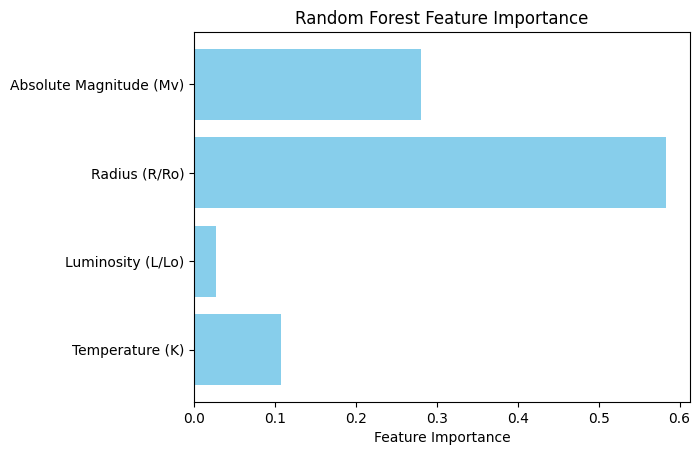

In [ ]:
#Some params are changed here

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Columns: 'mass', 'temperature', 'luminosity', 'radius', 'metallicity', 'age', 'stage'
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/train_stellar_data.csv")

X = data[['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute Magnitude (Mv)']] #Input features
y = data['Star Category'] #Output (Predicted value)

# Preprocessing data


# Normalization of datasets
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#Training
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
importances = model.feature_importances_
plt.barh(X.columns, importances, color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Forest Feature Importance")
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Step 1: Load the Dataset
# Replace 'your_dataset.csv' with the actual dataset file
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/train_stellar_data_DNN.csv')

# Features and Target
features = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute Magnitude (Mv)','Spectral Class']
target = 'Star Category'  # Replace with the actual column name for the target

# Step 2: Preprocess Data
star_category_mapping = {
    'Brown Dwarf': 0,
    'Red Dwarf': 1,
    'White Dwarf': 2,
    'Main Sequence': 3,
    'Supergiant': 4,
    'Hypergiant': 5
}
data['Star Category'] = data['Star Category'].map(star_category_mapping)
# One-hot encoding for Spectral Class
data_encoded = pd.get_dummies(data, columns=['Spectral Class'])

new_features_in_data_encoded=['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)',
       'Absolute Magnitude (Mv)', 'Spectral Class_A',
       'Spectral Class_B', 'Spectral Class_F', 'Spectral Class_G',
       'Spectral Class_K', 'Spectral Class_M', 'Spectral Class_O']

# Splitting features and target
X = data_encoded[new_features_in_data_encoded]
y = data[target]


# unique_count = data['Star Category'].unique()
# print(f"Number of unique items: {unique_count}")
# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert target to categorical
y_categorical = to_categorical(y)

# Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

# Step 4: Build the Neural Network Model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)), #relu means rectified linear unit
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer for classification
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Step 6: Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Step 7: Save the Model
model.save('stellar_stage_predictor.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7769 - loss: 0.7758 - val_accuracy: 0.9609 - val_loss: 0.1837
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9721 - loss: 0.1261 - val_accuracy: 0.9609 - val_loss: 0.1423
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9721 - loss: 0.1039 - val_accuracy: 0.9666 - val_loss: 0.1231
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9794 - loss: 0.0886 - val_accuracy: 0.9704 - val_loss: 0.0998
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9800 - loss: 0.0748 - val_accuracy: 0.9781 - val_loss: 0.0873
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0634 - val_accuracy: 0.9771 - val_loss: 0.0781
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9848 - loss: 0.0645 - val_accuracy: 0.9771 - val_loss: 0.0755
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9858 - loss: 0.0551 - val_accuracy: 0.

Test Accuracy: 0.99


In [ ]:
drive.flush_and_unmount()
